In [157]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [13]:
# Câu 1:
# a)Đọc dữ liệu,hiển thị thông tin chung của dữ liệu : shape, columns, head, tail, info
courses = pd.read_csv('./data/courses.csv')
subjects = pd.read_csv('./data/subjects.csv')

print('Courses data: ')
print(courses.shape)
print(courses.columns)
courses.head()

Courses data: 
(3678, 12)
Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'id_sub'],
      dtype='object')


,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,id_sub
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,2
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,2
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,2
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,2
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,2


In [16]:
print('Subjects data: ')
print(subjects.shape)
print(subjects.columns)
subjects.head()

Subjects data: 
(5, 4)
Index(['id', 'subject', 'total', 'dean'], dtype='object')


,id,subject,total,dean
0,1,Web Development,1200,Thomas Johnson
1,2,Business Finance,1195,Sophia Laura
2,3,Musical Instruments,680,Joseph Miller
3,4,Graphic Design,603,Jennifer Linda
4,5,Technology,0,Michael \tWilliams


In [9]:
courses.tail()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,id_sub
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,1
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,1
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,1
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,1
3677,297602,Using MODX CMS to Build Websites: A Beginner's...,https://www.udemy.com/using-modx-cms-to-build-...,True,45,901,36,20,Beginner Level,2.0,2014-09-28T19:51:11Z,1


In [10]:
courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  id_sub               3678 non-null   int64  
dtypes: bool(1), float64(1), int64(6), object(4)
memory usage: 319.8+ KB


In [17]:
#b) Xử lý dữ liệu
# Kết dữ liệu bảng courses và subjects,
subjects_courses = pd.merge(left=subjects, right=courses, how='inner', left_on='id', right_on='id_sub')
subjects_courses.head()

,id,subject,total,dean,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,id_sub
0,1,Web Development,1200,Thomas Johnson,28295,Learn Web Designing & HTML5/CSS3 Essentials in...,https://www.udemy.com/build-beautiful-html5-we...,True,75,43285,525,24,All Levels,4.0,2013-01-03T00:55:31Z,1
1,1,Web Development,1200,Thomas Johnson,19603,Learning Dynamic Website Design - PHP MySQL an...,https://www.udemy.com/learning-dynamic-website...,True,50,47886,285,125,All Levels,12.5,2012-06-18T16:52:34Z,1
2,1,Web Development,1200,Thomas Johnson,889438,ChatBots: Messenger ChatBot with API.AI and No...,https://www.udemy.com/chatbots/,True,50,2577,529,64,All Levels,4.5,2016-06-30T16:57:08Z,1
3,1,Web Development,1200,Thomas Johnson,197836,Projects in HTML5,https://www.udemy.com/projects-in-html5/,True,60,8777,206,75,Intermediate Level,15.5,2014-06-17T05:43:50Z,1
4,1,Web Development,1200,Thomas Johnson,505208,Programming Foundations: HTML5 + CSS3 for Entr...,https://www.udemy.com/html-css-more/,True,20,23764,490,58,Beginner Level,5.5,2015-10-17T04:52:25Z,1


In [18]:
# Xóa các cột không cần thiết : course_id,url,id,id_sub,total
subjects_courses.drop(columns=['course_id', 'url', 'id', 'id_sub', 'total'], inplace=True)
subjects_courses.head()

,subject,dean,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp
0,Web Development,Thomas Johnson,Learn Web Designing & HTML5/CSS3 Essentials in...,True,75,43285,525,24,All Levels,4.0,2013-01-03T00:55:31Z
1,Web Development,Thomas Johnson,Learning Dynamic Website Design - PHP MySQL an...,True,50,47886,285,125,All Levels,12.5,2012-06-18T16:52:34Z
2,Web Development,Thomas Johnson,ChatBots: Messenger ChatBot with API.AI and No...,True,50,2577,529,64,All Levels,4.5,2016-06-30T16:57:08Z
3,Web Development,Thomas Johnson,Projects in HTML5,True,60,8777,206,75,Intermediate Level,15.5,2014-06-17T05:43:50Z
4,Web Development,Thomas Johnson,Programming Foundations: HTML5 + CSS3 for Entr...,True,20,23764,490,58,Beginner Level,5.5,2015-10-17T04:52:25Z


In [20]:
# Tạo thêm cột 'revenue'= num_subscribers* price
subjects_courses['revenue'] = subjects_courses.num_subscribers * subjects_courses.price
subjects_courses.head()

,subject,dean,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,revenue
0,Web Development,Thomas Johnson,Learn Web Designing & HTML5/CSS3 Essentials in...,True,75,43285,525,24,All Levels,4.0,2013-01-03T00:55:31Z,3246375
1,Web Development,Thomas Johnson,Learning Dynamic Website Design - PHP MySQL an...,True,50,47886,285,125,All Levels,12.5,2012-06-18T16:52:34Z,2394300
2,Web Development,Thomas Johnson,ChatBots: Messenger ChatBot with API.AI and No...,True,50,2577,529,64,All Levels,4.5,2016-06-30T16:57:08Z,128850
3,Web Development,Thomas Johnson,Projects in HTML5,True,60,8777,206,75,Intermediate Level,15.5,2014-06-17T05:43:50Z,526620
4,Web Development,Thomas Johnson,Programming Foundations: HTML5 + CSS3 for Entr...,True,20,23764,490,58,Beginner Level,5.5,2015-10-17T04:52:25Z,475280


In [21]:
# Hiển thị thông tin các cột như sau :
subjects_courses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   subject              3678 non-null   object 
 1   dean                 3678 non-null   object 
 2   course_title         3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  revenue              3678 non-null   int64  
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 508.4+ KB


In [56]:
# c) Lọc ra các  khóa  học thuộc nhóm Musical  Instrumentsmàtiêu đề (course_title)có  chứa “Guitarist”như hình sau:

musical_instruments_courses = subjects_courses.loc[subjects_courses.subject.str.contains('Musical Instruments') & subjects_courses.course_title.str.contains('Guitarist')]

guitarist_courses.head()

,subject,dean,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,revenue
2395,Musical Instruments,Joseph Miller,"7 Ways A Beginner Guitarist Can Sound Better, ...",False,0,4529,193,7,Beginner Level,0.6,2015-12-21T18:50:50Z,0
2396,Musical Instruments,Joseph Miller,Instant Harmonica - Christmas. Play Jingle Bel...,True,20,823,11,10,All Levels,0.7,2015-12-11T18:42:43Z,16460
2397,Musical Instruments,Joseph Miller,Playing Piano: Popular Pieces Vol. II,True,150,1472,4,24,Beginner Level,1.5,2016-03-31T17:24:49Z,220800
2398,Musical Instruments,Joseph Miller,Ninja Chord Changes - Master your guitar chord...,True,30,1327,11,13,Beginner Level,1.5,2015-03-29T21:57:12Z,39810
2399,Musical Instruments,Joseph Miller,Your First 10 Guitar Lessons - Learn how to pl...,False,0,924,4,18,Beginner Level,1.0,2017-06-29T00:29:36Z,0


In [75]:
# d) Thống kê giá trung  bình và doanh thu trung bình của các khóa học theo subject và level,  kết quả gợi ý như hình sau, bạn có nhận xét gì với kết quả có được
subjects_courses.groupby(by=['subject', 'level'])['price', 'revenue'].agg(['mean'])

print('Nhận xét: Giá của các khóa học tăng khi level càng cao, tuy nhiên phần lớn doanh thu tập trung vào các khóa cơ bản.')

price        revenue
                                              mean           mean
subject             level                                        
Business Finance    All Levels           75.201149  120811.443966
                    Beginner Level       53.382353   80147.485294
                    Expert Level         95.967742  129994.677419
                    Intermediate Level   66.054688   65395.078125
Graphic Design      All Levels           62.701342  159184.798658
                    Beginner Level       53.477366  109278.724280
                    Expert Level         70.000000    5067.000000
                    Intermediate Level   49.824561   52035.701754
Musical Instruments All Levels           55.978261  139663.731884
                    Beginner Level       43.378378   35228.344595
                    Expert Level         36.428571   37739.285714
                    Intermediate Level   51.039604   40793.069307
Web Development     All Levels           82.526555  667633.907436
                    Beginner Level       68.363171  397559.782609
                    Expert Level        113.666667   76648.333333
                    Intermediate Level   71.259259  253906.888889

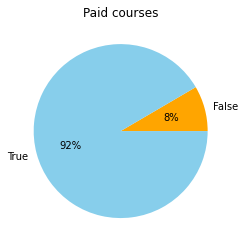

In [91]:
# e) Vẽ biểu đồ pie chart cho biết tỷ lệ các khóa học Free và Paid trên Udemy
free_courses = (subjects_courses.is_paid == False).sum()
paid_courses = (subjects_courses.is_paid == True).sum()
plt.pie([free_courses, paid_courses], labels=['False', 'True'], colors=['orange', 'skyblue'], autopct = '%1.0f%%')
plt.title('Paid courses')
plt.show()

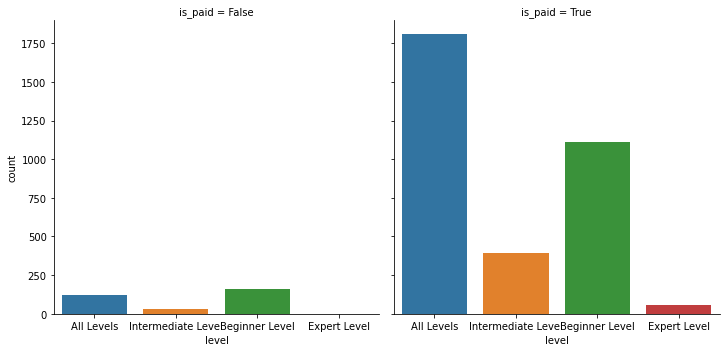

In [128]:
# f) Vẽ biểu đồ thống kê số lượng khóa học theo từng level, có phân loại (miễn phívà trả phí)như hình sau, rồicho nhận xét

free_courses = subjects_courses[subjects_courses.is_paid == False]
paid_courses = subjects_courses[subjects_courses.is_paid == True]

sns.catplot(data=subjects_courses, col="is_paid", x="level", kind="count")

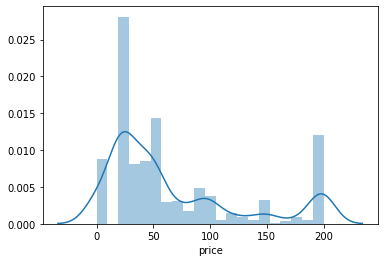

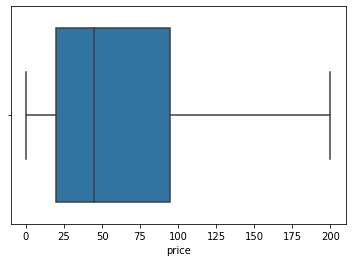

In [138]:
# g) Vẽ biểu đồ phân phối tần suất các khóa họctheo học phí (price)và biểu đồ box plot của price, kết quả gợi ý nhưhình sauvà cho nhận xét:
sns.distplot(subjects_courses.price)
plt.show()
sns.boxplot(subjects_courses.price)
plt.show()

print("Nhận xét: giá tập trung vào khu vực từ 25 tới 50 ")

Nhận xét: các khóa học đều có giá tập trung khu vực 50, Musical Instruments có nhiều outliner


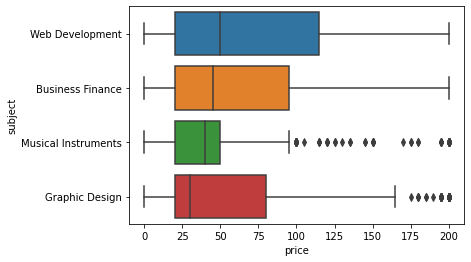

In [146]:
# h)Vẽbiểu đồ thể hiện boxplotgiákhóa học giữa các thể loại và cho nhận xét 
sns.boxplot(data=subjects_courses, x='price', y='subject')
print("Nhận xét: các khóa học đều có giá tập trung khu vực 50, Musical Instruments có nhiều outliner")

Nhận xét: 


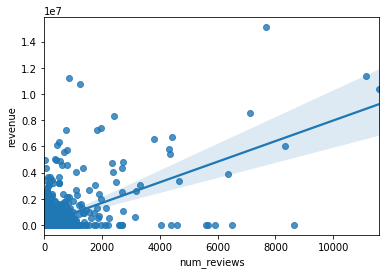

In [148]:
# i) Vẽ biểu đồ thể hiện tương quan giữa num_reviews và num_subscribers(chỉ chọn những khóa  có num_reviews < 15000)như hình sau rồicho nhận xét
new_subjects_courses = subjects_courses[subjects_courses.num_reviews < 15000]
sns.regplot(data=new_subjects_courses, x='num_reviews', y='revenue', truncate=True)

print("Nhận xét: Các course có nhiều người review thì revenue thường không cao")


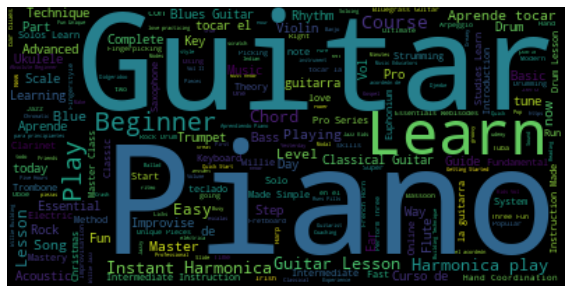

In [155]:
# j) Tạobiểuđồ Wordcloud dựa trên course_titlevới subject là Musical  Instruments, có kết quả gợi ý như sau:
stopwords = set(STOPWORDS)
musical_instruments_courses = subjects_courses[subjects_courses['subject'] == 'Musical Instruments']
key_words =' '.join(musical_instruments_courses.course_title.values)

wc = WordCloud(
    background_color='black',
    stopwords=stopwords
)

# generate the word cloud
wc.generate(key_words)

# display the word clouds
plt.figure(figsize=(10, 12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

print('Nhận xét: Các từ khóa như Piano và Guitar xuất hiện nhiều nhất')

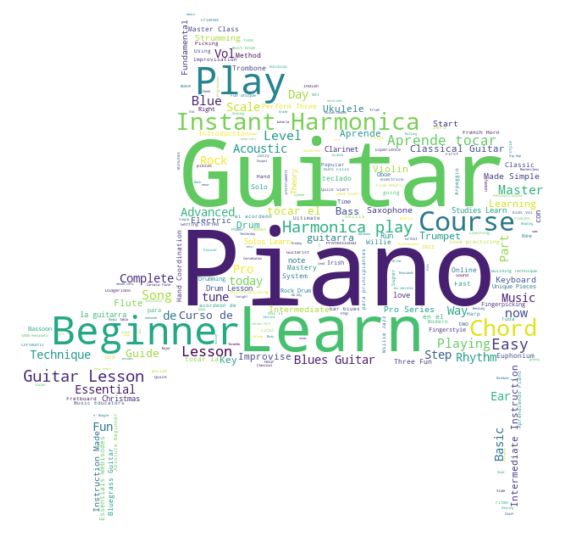

In [159]:
# k) Cho tập tin hình ảnh piano.jpg, hãy tạo biểu đồ có kết quả gợi ý như hình sau
wc_mask = np.array(Image.open('./data/piano.jpg'))

wc = WordCloud(background_color='white', max_words=1000, 
                mask=wc_mask, stopwords=stopwords)

wc.generate(key_words)

plt.figure(figsize=(10, 12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()